<IPython.core.display.Javascript object>


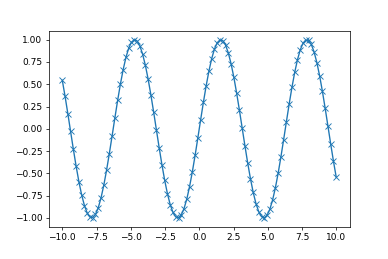

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
%matplotlib notebook

# matplotlib test, for some reason notebook isn't working
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print(f"keys of iris dataset: \n{iris_dataset.keys()}")

keys of iris dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print(iris_dataset["DESCR"][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [8]:
print(f"Target names: {iris_dataset['target_names']}")

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
print(f"Feature names: \n{iris_dataset['feature_names']}")

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(f"Type of data: {type(iris_dataset['data'])}")

Type of data: <class 'numpy.ndarray'>


In [11]:
print(f"Shape of the data: {iris_dataset['data'].shape}")

Shape of the data: (150, 4)


In [12]:
print(f"The first five columns of the data are: \n{iris_dataset['data'][:5]}")

The first five columns of the data are: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [13]:
print(f"Type of target: {type(iris_dataset['target'])}")

Type of target: <class 'numpy.ndarray'>


In [14]:
# 1D array
print(f"Shape of target: {iris_dataset['target'].shape}")

Shape of target: (150,)


In [15]:
# target matrix
print(f"Target: \n{iris_dataset['target']}")
# target legend, list position corresponds to matrix
print(f"\n Target legend: {iris_dataset['target_names']}")

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

 Target legend: ['setosa' 'versicolor' 'virginica']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
      

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


<IPython.core.display.Javascript object>


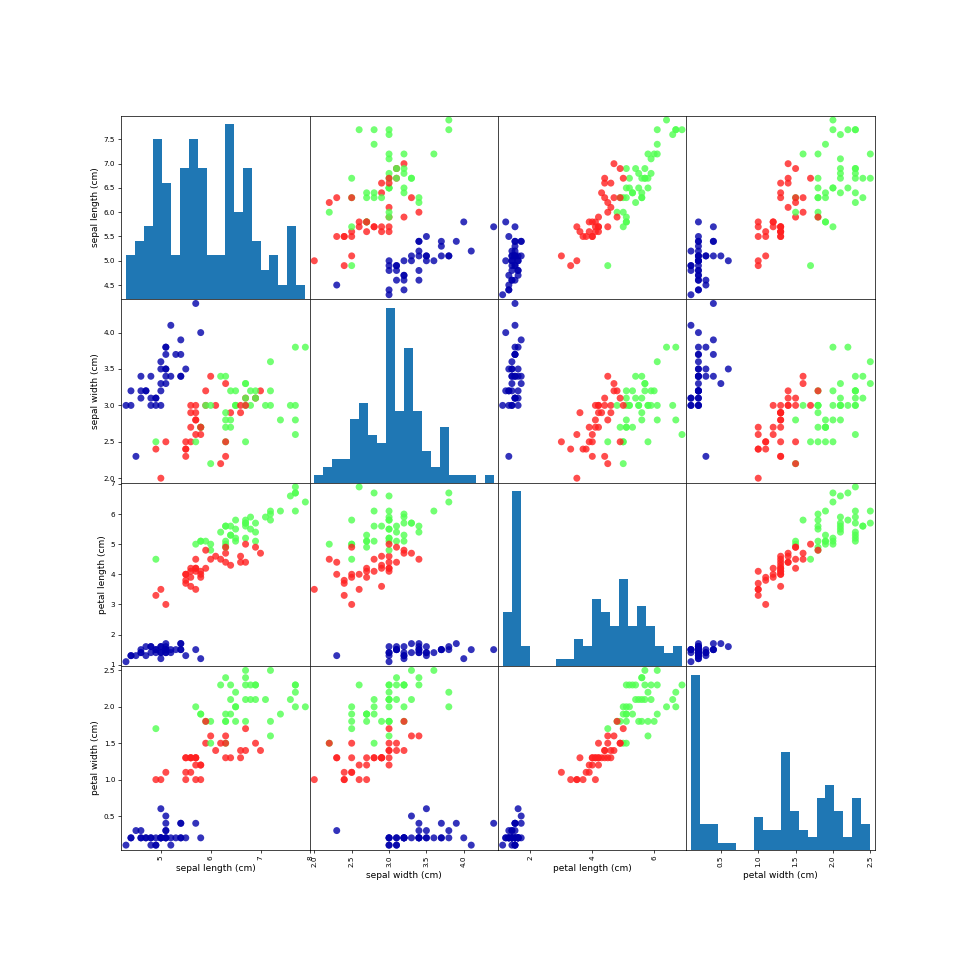

In [17]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                       marker="o", hist_kwds={"bins":20},s=60, alpha=.8,
                       cmap=mglearn.cm3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

In [21]:
print(iris_dataset["target_names"][prediction])

['setosa']


In [22]:
y_pred = knn.predict(X_test)
print(f"Test set predictions:\n{y_pred}")

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
print(f"Test set score:\n{np.mean(y_pred == y_test):.2f}")
print(f"\nTest set score:\n{round(knn.score(X_test, y_test),2)}")

Test set score:
0.97

Test set score:
0.97
